In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np

from DPF.formatters.t2i_formatter import T2IFormatter

### Read dataset from local disk

In [2]:
formatter = T2IFormatter()

processor = formatter.from_shards(
    '../data/example_shards_format/', 
    imagename_column='image_name',
    caption_column='rus_caption',
    progress_bar=True,
    processes=8
)

  0%|          | 0/21 [00:00<?, ?it/s]

### Read dataset directly from S3

In [8]:
# create a formatter

formatter = T2IFormatter(
    filesystem='s3',
    key='your_access_key',
    secret='your_secret_key',
    endpoint_url='your_endpoint'
)

In [9]:
# create processor for dataset

processor = formatter.from_shards(
    'path_to_your_dataset_on_s3', 
    imagename_column='image_name',
    caption_column='rus_caption',
    progress_bar=True,
    processes=2
)

  0%|          | 0/3 [00:00<?, ?it/s]

### Get random samples from dataset

In [23]:
help(processor.get_random_samples)

Help on method get_random_samples in module DPF.processors.text2image.shards_processor:

get_random_samples(df: Union[pandas.core.frame.DataFrame, NoneType] = None, n: int = 1, from_tars: int = 1) -> list method of DPF.processors.text2image.shards_processor.ShardsProcessor instance
    Get N random samples from dataset
    
    Parameters
    ----------
    df: pd.DataFrame | None
        DataFrame to sample from. If none, processor.df is used
    n: int = 1
        Number of samples to return
    from_tars: int = 1
        Number of archives to sample from
        
    Returns
    -------
    list
        List of tuples with PIL images and dataframe data



In [20]:
samples = processor.get_random_samples(n=1)

картина владимира леонидовича хвостика улица.фонарь.аптека.1976год в стиле авангард


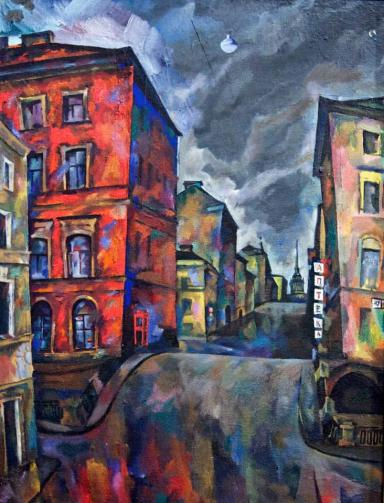

In [21]:
sample = samples[0]
print(sample[1]['caption'])
sample[0] # pil image

you can set number of archives to get samples from 

In [24]:
samples = processor.get_random_samples(n=20, from_tars=2)
print(len(samples))

20


картина "вид на казанский", автор liubov permyakova


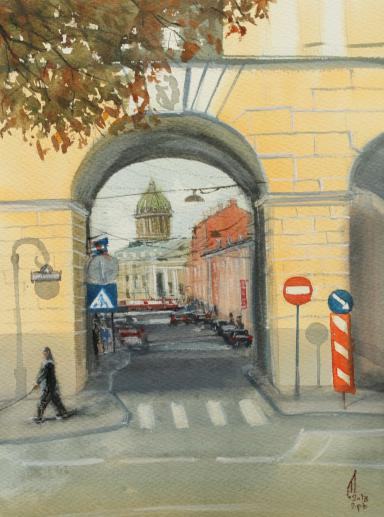

In [25]:
sample = samples[0]
print(sample[1]['caption'])
sample[0] # pil image

## Filesystem

You can get a filesystem object and work with it if you need

In [3]:
fs = processor.get_filesystem()

In [6]:
help(fs)

Help on LocalFileSystem in module DPF.filesystems.localfilesystem object:

class LocalFileSystem(DPF.filesystems.filesystem.FileSystem)
 |  Class that wrappers interaction with local filesystem.
 |  
 |  Method resolution order:
 |      LocalFileSystem
 |      DPF.filesystems.filesystem.FileSystem
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  listdir(self, folder_path: str, filenames_only: Union[bool, NoneType] = False) -> List[str]
 |      Returns the contents of folder
 |      
 |      Parameters
 |      ----------
 |      folder_path: str
 |          Path to folder
 |      filenames_only: bool = False
 |          Returns only filenames if True
 |      
 |      Returns
 |      -------
 |      List[str]
 |          List of filepaths (filenames if filenames_only)
 |  
 |  mkdir(self, folder_path: str) -> None
 |      Creates a directory
 |      
 |      Parameters
 |      --

In [9]:
fs.listdir('./')

['./explore_text2image_dataset.ipynb', './.ipynb_checkpoints']